<a href="https://colab.research.google.com/github/ykitaguchi77/manipulate_CSV/blob/master/Json_to_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Jsonファイルを結合してcsvに出力するスクリプト**

In [1]:
import json
import codecs
import os
import pandas as pd
from pandas.io.json import json_normalize
import glob
import shutil

#**テスト用データ作成**

In [11]:
from IPython.core.display import JSON
#サンプルデータセットの作成
data1 = {"pq1":"20220103", "pq2": "hashhashhash", "pq3": "idididid", "pq4": "1", "pq5": "右", "pq6": "●●大", "pq7": "正常", "pq8": ""}
data2 = {"pq1":"20220104", "pq2": "ashhashhashh", "pq3": "didididi", "pq4": "2", "pq5": "左", "pq6": "■■大", "pq7": "翼状片", "pq8": ""}
data3 = {"pq1":"20220105", "pq2": "shhashhashha", "pq3": "didididi", "pq4": "3", "pq5": "左", "pq6": "▲▲病院", "pq7": "瘢痕", "pq8": ""}


#テストデータをcontentフォルダ内に格納
dir = "/content/json_files"
os.makedirs(dir, exist_ok=True)

with open(dir+"/1.json", 'w') as f:
    json.dump(data1, f, ensure_ascii=False)
    
with open(dir+"/2.json", 'w') as f:
    json.dump(data2, f, ensure_ascii=False)

with open(dir+"/3.json", 'w') as f:
    json.dump(data3, f, ensure_ascii=False)


with open("/content/json_files/1.json") as f:
    json1 = json.load(f)

with open("/content/json_files/2.json") as f:
    json2 = json.load(f)

with open("/content/json_files/3.json") as f:
    json3 = json.load(f)

#contentフォルダ内のjsonファイルを読み込み
print("サンプルデータ")
print(json1)
print(json2)
print(json3)

サンプルデータ
{'pq1': '20220103', 'pq2': 'hashhashhash', 'pq3': 'idididid', 'pq4': '1', 'pq5': '右', 'pq6': '●●大', 'pq7': '正常', 'pq8': ''}
{'pq1': '20220104', 'pq2': 'ashhashhashh', 'pq3': 'didididi', 'pq4': '2', 'pq5': '左', 'pq6': '■■大', 'pq7': '翼状片', 'pq8': ''}
{'pq1': '20220105', 'pq2': 'shhashhashha', 'pq3': 'didididi', 'pq4': '3', 'pq5': '左', 'pq6': '▲▲病院', 'pq7': '瘢痕', 'pq8': ''}


#**Jsonファイルを結合してCSVに出力**

"json-files"と名付けたフォルダにjsonファイルを入れ、contentフォルダ内にドラッグ&ドロップ（アップロードされます） <br>
下のスクリプトを実行すると、contentフォルダ内に症例リストが"list.csv"として出力されますので、ダウンロードして下さい。<br>
<br>
<br>
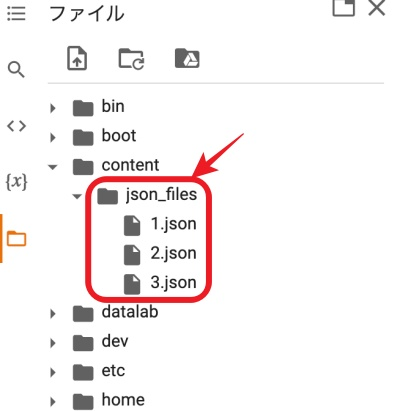

In [9]:
json_dir = "/content/json_files"
json_list = glob.glob(json_dir+"/*")  #json_dir内のファイルリスト

#空のデータフレームを作成
#pq1:date, pq2: HashID, pq3: ID, pq4: imageNum, pq5: side, pq6: hospital, pq7: disease, pq8: free
df = pd.DataFrame(columns=['pq1', 'pq2', 'pq3', 'pq4', 'pq5', 'pq6', 'pq7', 'pq8'])

for idx, jsonpath in enumerate(json_list):
    with open(jsonpath) as f:
        jsondata = json.load(f) #Jsonファイルを開く
    df.loc[idx, :] = jsondata     #データフレームに追加

df = df.set_axis(df["pq2"].tolist(), axis=0)  #pq2(HashID)をインデックスに
df = df.drop(["pq2", "pq3"], axis = 1)      #不要な列を削除
df

,pq1,pq4,pq5,pq6,pq7,pq8
hashhashhash,20220103,1,右,●●大,正常,
ashhashhashh,20220104,2,左,■■大,翼状片,
ashhashhashh,20220104,2,左,■■大,翼状片,


In [ ]:
df.to_csv('/content/list.csv')  #CSVファイルとして出力

#**既存のjson-filesフォルダを削除してやり直したいときに実行**

In [ ]:
#既存のjson_filesフォルダを削除したいときに実行
if os.path.exists(dir):
    shutil.rmtree(dir)